# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
257137               2020-07-27           2020-07-25            2020-07-14   
257138               2020-07-27           2020-07-25            2020-07-14   
257139               2020-07-27           2020-07-25            2020-07-14   
257140               2020-07-27           2020-07-25            2020-07-14   
257141               2020-07-27           2020-07-25            2020-07-14   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
257137             2020-07-07 00:00:00                   NaT   
257138             2020-07-07 00:00:00                   NaT   
257139             2020-07-07 00:00:00                   NaT   
257140             2020-07-07 00:00:00                   NaT   
257141             2020-07-07 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
257137                    NaT            Florencia          Caquetá      Leve   
257138                    NaT            Florencia          Caquetá      Leve   
257139                    NaT        Villavicencio             Meta      Leve   
257140                    NaT        Villavicencio             Meta      Leve   
257141                    NaT      Barrancabermeja        Santander      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
257137            Casa  ...               30 - 40    F               NaN   
257138            Casa  ...               20 - 30    F               NaN   
257139            Casa  ...               40 - 50    M               NaN   
257140            Casa  ...               40 - 50    M               NaN   
257141            Casa  ...               50 - 60    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1056   1450
Antioquia                                           11495  14622
Arauca                                                 38    143
Archipiélago de San Andrés Providencia y Santa ...     10     25
Atlántico                                            9909  11226
Barranquilla D.E.                                   12866  15036
Bogotá D.C.                                         42598  44259
Bolívar                                              1011   1209
Boyacá                                                409    411
Buenaventura D.E.                                     754   1283
Caldas                                                360    363
Caquetá                                               348    330
Cartagena D.T. y C.                                  6565   8098
Casanare                                              107    145
Cauca                                                 704    920
Cesar                                                1129   1507
Chocó                                                1320   1541
Cundinamarca                                         3563   3678
Córdoba                                              2196   2308
Guainía                                                 6      8
Guaviare                                                9     71
Huila                                                 358    363
La Guajira                                            909    979
Magdalena                                             963   1028
Meta                                                  581   1732
Nariño                                               3217   3873
Norte de Santander                                    737   1048
Putumayo                                              340    419
Quindío                                               139    128
Risaralda                                             717    632
Santa Marta D.T. y C.                                1658   1748
Santander                                            1103   1694
Sucre                                                2486   2954
Tolima                                                734   1439
Valle del Cauca                                      9253  10720
Vaupés                                                 27     34
Vichada                                                 1      1

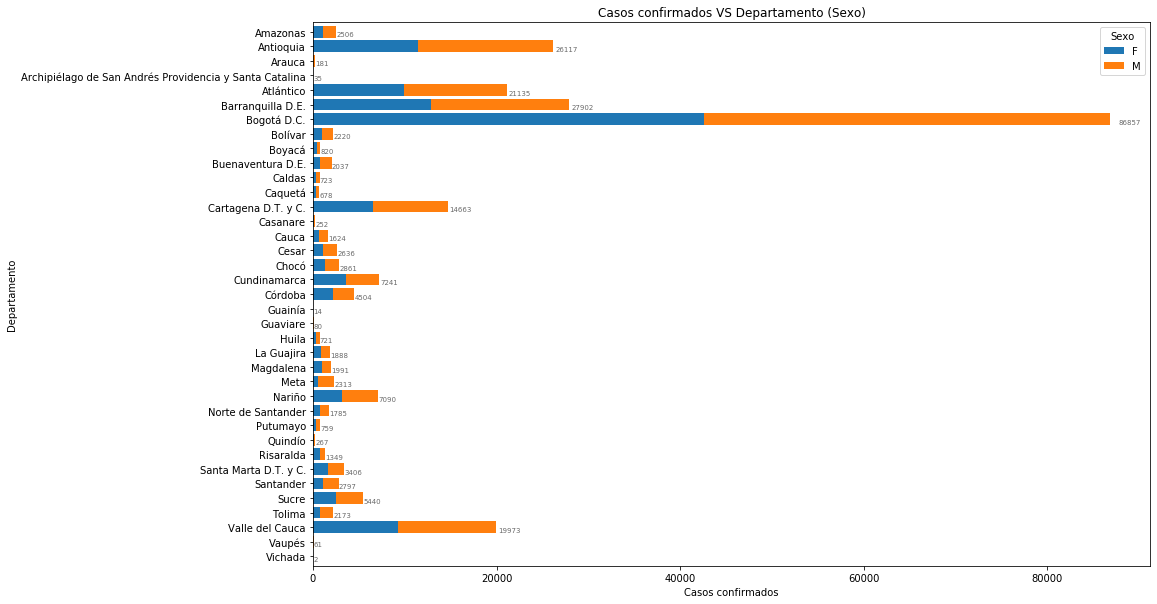

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                              872     1858     6938   
Arauca                                                   7       38       71   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              922     1584     4592   
Barranquilla D.E.                                     1065     1758     6123   
Bogotá D.C.                                           3807     6658    19858   
Bolívar                                                105      212      481   
Boyacá                                                  50       70      173   
Buenaventura D.E.                                       44      279      462   
Caldas                                                  27       45      166   
Caquetá                                                 22       44      203   
Cartagena D.T. y C.                                    613     1059     3364   
Casanare                                                12       12       77   
Cauca                                                   83      142      393   
Cesar                                                  181      244      634   
Chocó                                                  122      249      666   
Cundinamarca                                           357      531     1666   
Córdoba                                                151      222      914   
Guainía                                                  0        2        4   
Guaviare                                                 1       31       16   
Huila                                                   42       70      141   
La Guajira                                             103      189      416   
Magdalena                                              106      145      364   
Meta                                                    39      190      732   
Nariño                                                 336      615     1656   
Norte de Santander                                      60       71      417   
Putumayo                                                20       56      222   
Quindío                                                  9       14       50   
Risaralda                                               88      122      302   
Santa Marta D.T. y C.                                  131      234      758   
Santander                                              101      217      685   
Sucre                                                  224      430     1138   
Tolima                                                  93      132      686   
Valle del Cauca                                        685     1378     4558   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      340      273   
Antioquia                                              6581     4091     3059   
Arauca                                                   43       12        6   
Archipiélago de San Andrés Providencia y Santa ...       11        8        3   
Atlántico                                              4945     3361     2744   
Barranquilla D.E.                                      6627     4366     3756   
Bogotá D.C.                                           19087    14008    11760   
Bolívar                                                 521      325      202   
Boyacá                                                  155      129 

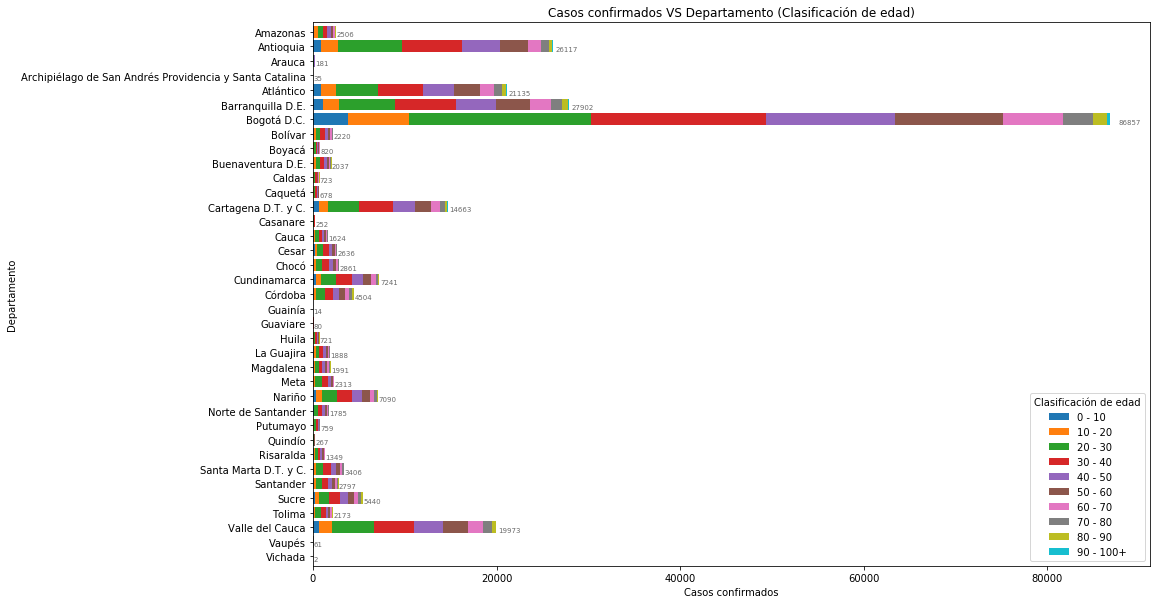

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               75.0      101.0   
Antioquia                                           17104.0      363.0   
Arauca                                                 47.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      4.0        0.0   
Atlántico                                            5016.0      986.0   
Barranquilla D.E.                                    5758.0     1427.0   
Bogotá D.C.                                         41176.0     2307.0   
Bolívar                                               751.0      104.0   
Boyacá                                                294.0       26.0   
Buenaventura D.E.                                     292.0      132.0   
Caldas                                                401.0        9.0   
Caquetá                                               503.0       12.0   
Cartagena D.T. y C.                                  3009.0      447.0   
Casanare                                              114.0        4.0   
Cauca                                                 757.0       52.0   
Cesar                                                 982.0       52.0   
Chocó                                                 622.0       95.0   
Cundinamarca                                         2816.0      187.0   
Córdoba                                              2115.0      488.0   
Guainía                                                 0.0        1.0   
Guaviare                                               30.0        0.0   
Huila                                                 279.0       18.0   
La Guajira                                            776.0      105.0   
Magdalena                                             574.0      186.0   
Meta                                                  662.0       30.0   
Nariño                                               2555.0      210.0   
Norte de Santander                                   1121.0       70.0   
Putumayo                                              591.0       24.0   
Quindío                                                57.0        6.0   
Risaralda                                             601.0       25.0   
Santa Marta D.T. y C.                                1336.0      134.0   
Santander                                            1370.0       68.0   
Sucre                                                2217.0      346.0   
Tolima                                                777.0       37.0   
Valle del Cauca                                      6900.0      723.0   
Vaupés                                                 11.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                13.0           6.0   
Antioquia                                             1098.0         160.0   
Arauca                                                   7.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              748.0         106.0   
Barranquilla D.E.                                      872.0         100.0   
Bogotá D.C.                                           4997.0         325.0   
Bolívar                                                115.0           9.0   
Boyacá                                                  58.0           6.0   
Buenaventura D.E.                                      118.0          27.0   
Caldas                                                  29.0           8.0   
Caquetá                                                 60.0           5.0   
Cartagena D.T. y C.  

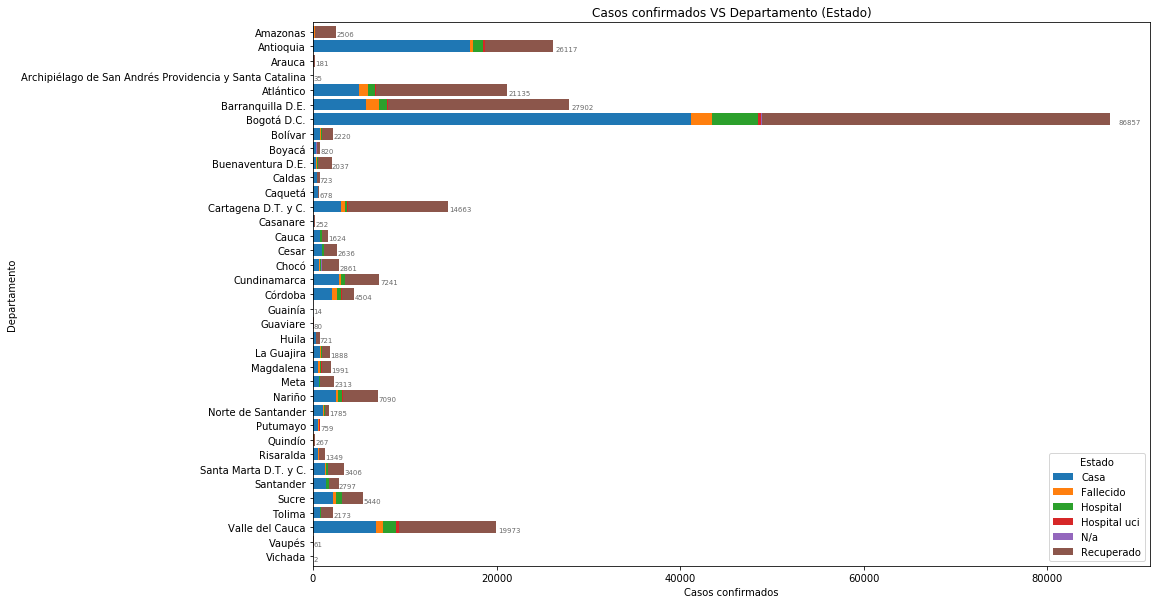

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          48384  53309
Fallecido      3215   5562
Hospital       5703   7695
Hospital uci    555   1006
N/a             218    293
Recuperado    61601  69560

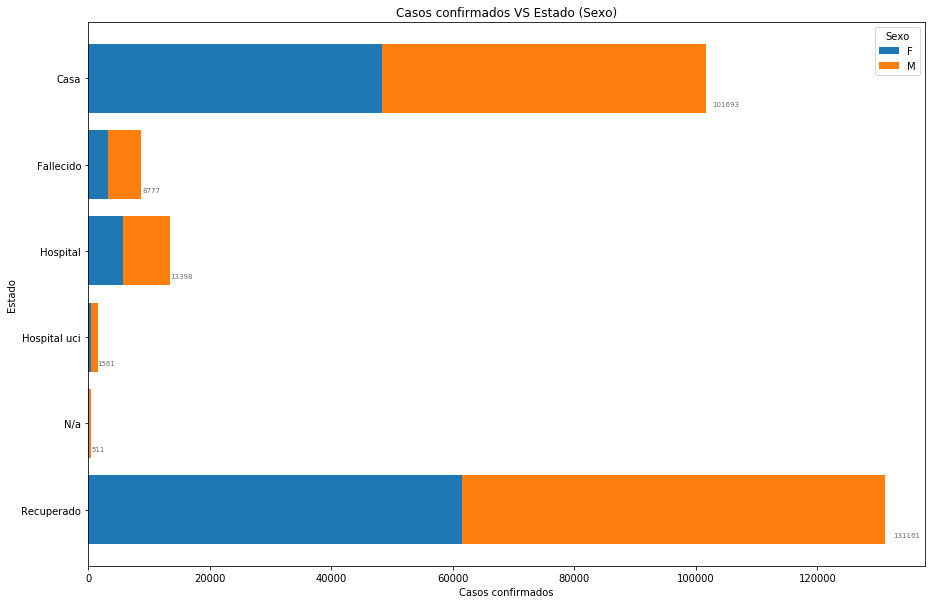

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3952     7799    25458    25273    16674    12511   
Fallecido                  14       18      126      305      711     1340   
Hospital                  517      290     1093     1721     2083     2806   
Hospital uci               64       27       55      164      223      371   
N/a                        14       10       22       22       40       65   
Recuperado               6054    11216    32710    31800    20639    15713   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      6079     2644     1125        178  
Fallecido                 2057     2202     1621        383  
Hospital                  2447     1578      762        101  
Hospital uci               356      222       74          5  
N/a                         95      111      102         30  
Recuperado                7945     3499     1361        224

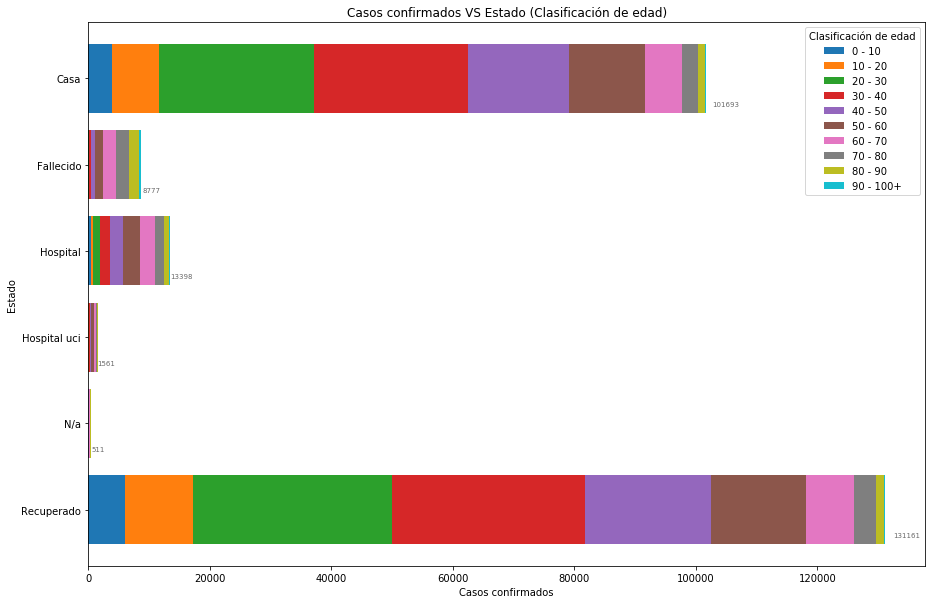

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   113336  123810
Importado       454     518
Relacionado    5886   13097

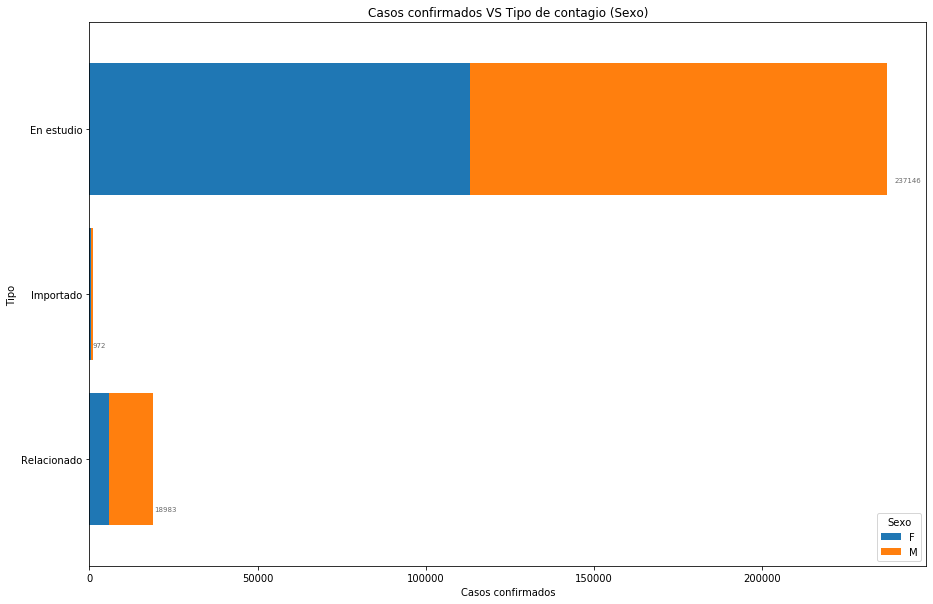

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               9761    16943    53977    54520    37724    30845   
Importado                   6       37      239      229      172      150   
Relacionado               848     2380     5248     4536     2474     1811   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               17968     9771     4778        859  
Importado                   94       35        9          1  
Relacionado                917      450      258         61

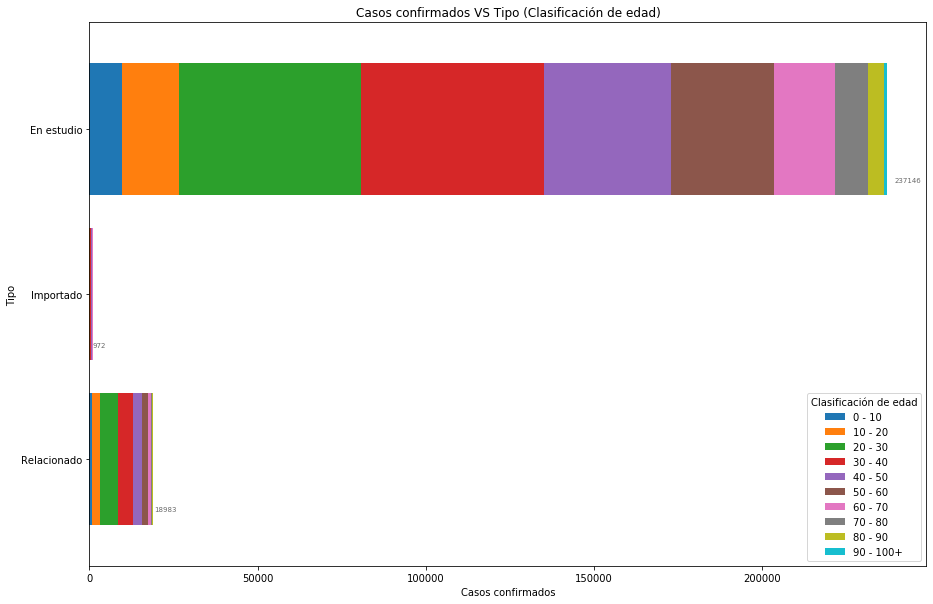

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5269   5346
10 - 20                 8875  10485
20 - 30                28107  31357
30 - 40                27098  32187
40 - 50                18866  21504
50 - 60                15126  17680
60 - 70                 8693  10286
70 - 80                 4643   5613
80 - 90                 2465   2580
90 - 100+                534    387

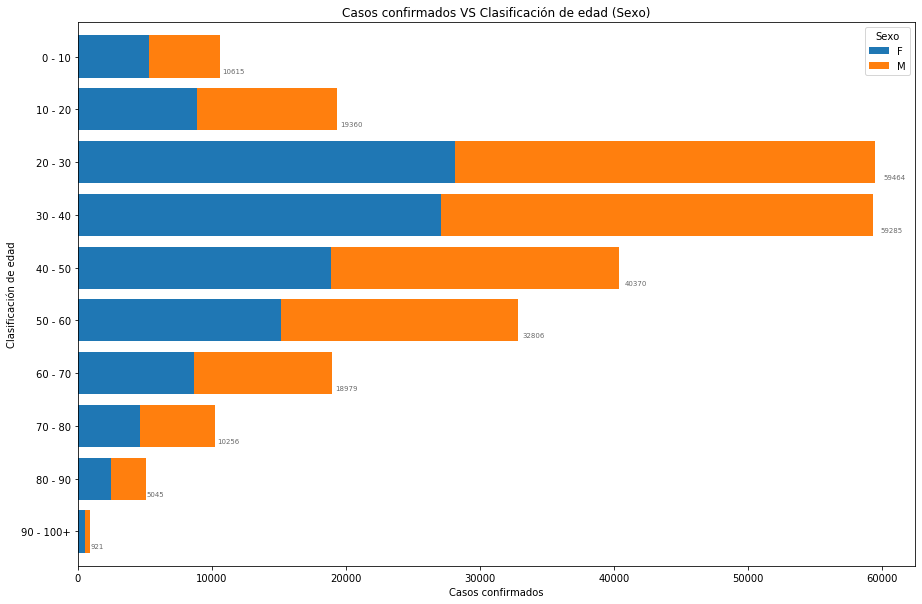

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3952         14       517            64   14   
10 - 20                 7799         18       290            27   10   
20 - 30                25458        126      1093            55   22   
30 - 40                25273        305      1721           164   22   
40 - 50                16674        711      2083           223   40   
50 - 60                12511       1340      2806           371   65   
60 - 70                 6079       2057      2447           356   95   
70 - 80                 2644       2202      1578           222  111   
80 - 90                 1125       1621       762            74  102   
90 - 100+                178        383       101             5   30   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       6054  
10 - 20                     11216  
20 - 30                     32710  
30 - 40                     31800  
40 - 50                     20639  
50 - 60                     15713  
60 - 70                      7945  
70 - 80                      3499  
80 - 90                      1361  
90 - 100+                     224

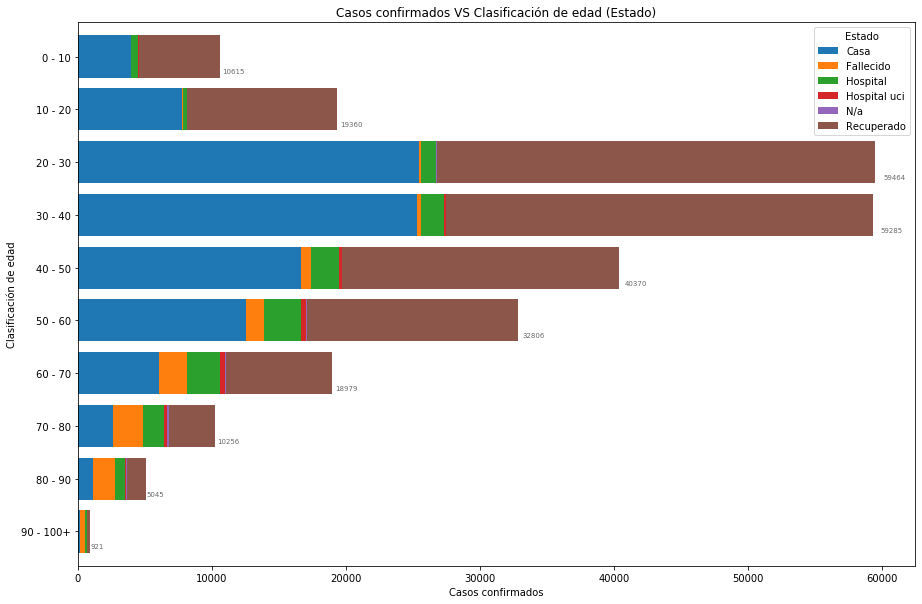

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-23            3162.0  3490.0
2020-07-24            3490.0  4126.0
2020-07-25            2738.0  2660.0
2020-07-26            1380.0  1453.0
2020-07-27            1422.0  1583.0

[141 rows x 2 columns]

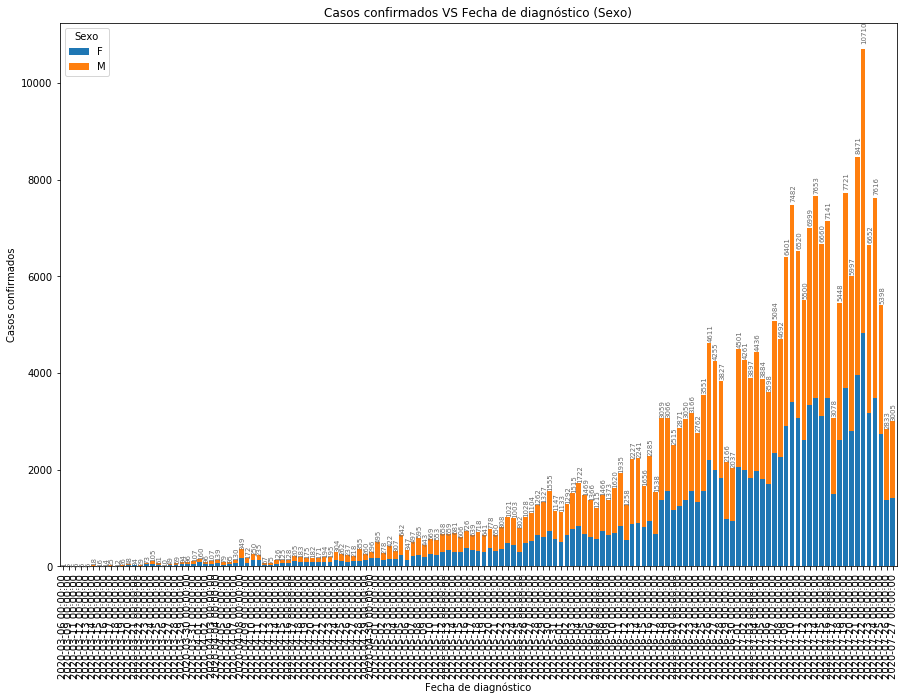

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-23                234      452     1474     1511     1071      876   
2020-07-24                249      553     1750     1875     1223      986   
2020-07-25                192      337     1224     1243      885      740   
2020-07-26                 96      158      648      656      468      366   
2020-07-27                 91      245      739      720      485      339   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-23                 529      308      172         25  
2020-07-24                 532      311      120         17  
2020-07-25                 417      228      112         20  
2020-07-26                 207      150       75          9  
2020-07-27                 204       95       71         16  

[141 rows x 10 columns]

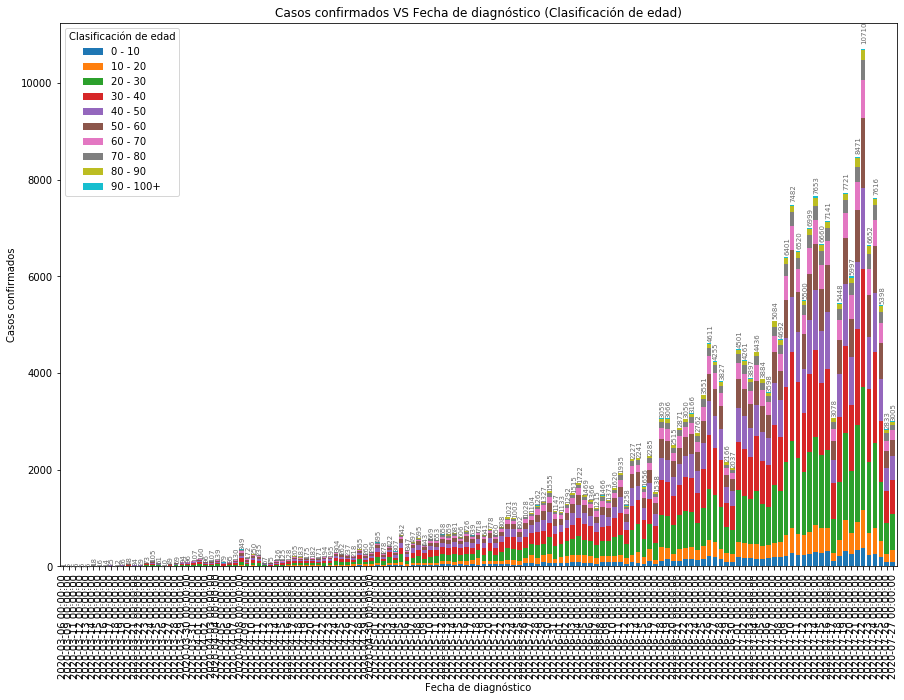

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                    
2020-03-06               0.0        0.0       0.0           0.0   0.0   
2020-03-09               0.0        0.0       0.0           0.0   0.0   
2020-03-11               0.0        0.0       0.0           0.0   0.0   
2020-03-12               0.0        0.0       0.0           0.0   0.0   
2020-03-13               0.0        0.0       0.0           0.0   0.0   
...                      ...        ...       ...           ...   ...   
2020-07-23            5944.0      149.0     510.0          38.0  10.0   
2020-07-24            7008.0      107.0     435.0          37.0   3.0   
2020-07-25            4813.0       92.0     436.0          37.0   3.0   
2020-07-26            2504.0       16.0     273.0          39.0   0.0   
2020-07-27            2873.0        0.0     129.0           3.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-23                   1.0  
2020-07-24                  26.0  
2020-07-25                  17.0  
2020-07-26                   1.0  
2020-07-27                   0.0  

[141 rows x 6 columns]

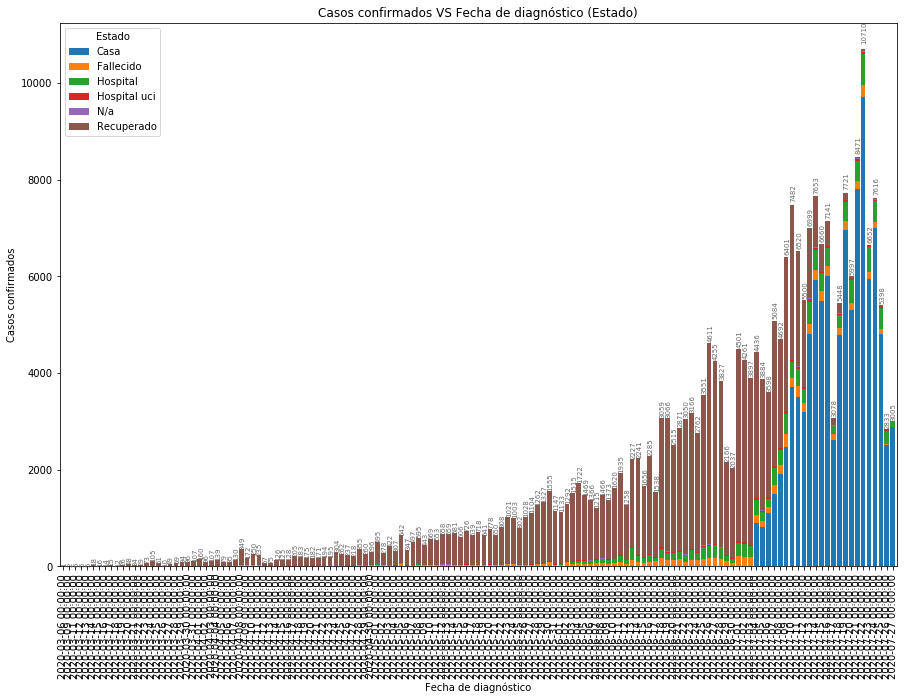

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-23            108867.0  125602.0
2020-07-24            112357.0  129728.0
2020-07-25            115095.0  132388.0
2020-07-26            116475.0  133841.0
2020-07-27            117897.0  135424.0

[141 rows x 2 columns]

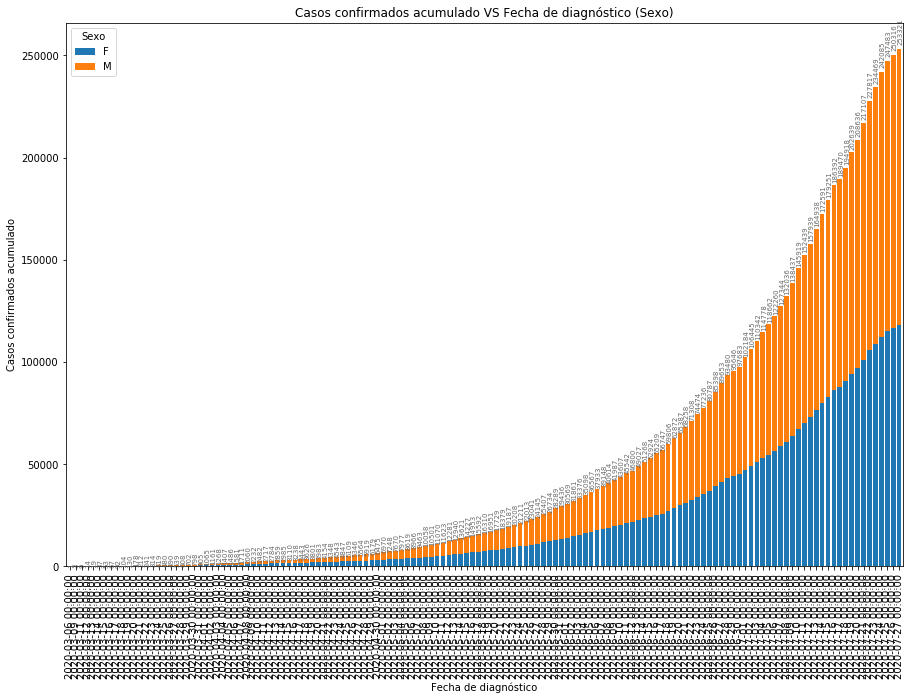

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-23               9854    17791    54200    53883    36754    29913   
2020-07-24              10103    18344    55950    55758    37977    30899   
2020-07-25              10295    18681    57174    57001    38862    31639   
2020-07-26              10391    18839    57822    57657    39330    32005   
2020-07-27              10482    19084    58561    58377    39815    32344   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-23               17328     9314     4583        849  
2020-07-24               17860     9625     4703        866  
2020-07-25               18277     9853     4815        886  
2020-07-26               18484    10003     4890        895  
2020-07-27               18688    10098     4961        911  

[141 rows x 10 columns]

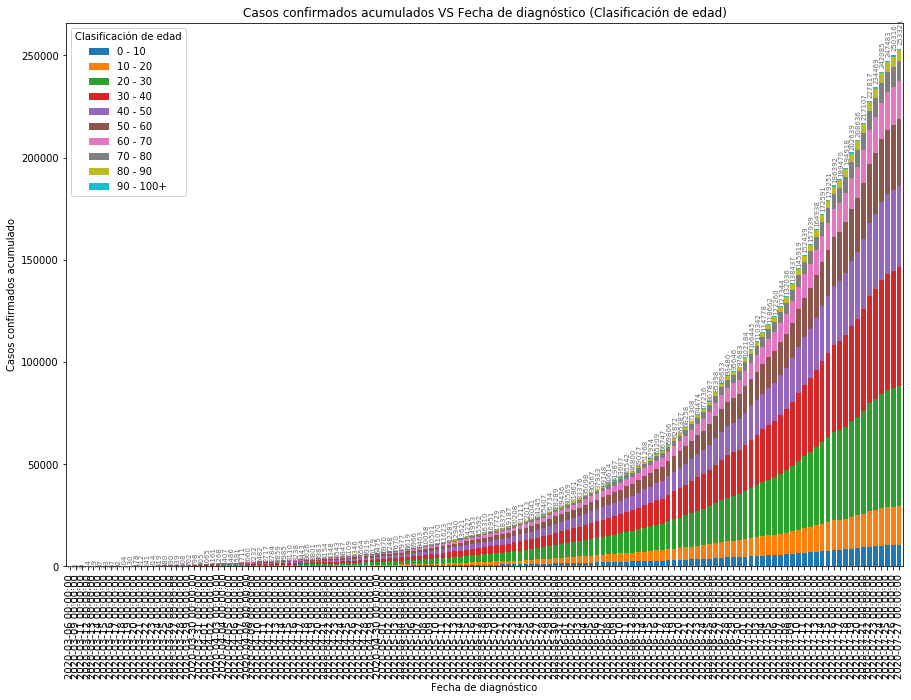

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-23             84444.0     8386.0   11977.0        1412.0  486.0   
2020-07-24             91452.0     8493.0   12412.0        1449.0  489.0   
2020-07-25             96265.0     8585.0   12848.0        1486.0  492.0   
2020-07-26             98769.0     8601.0   13121.0        1525.0  492.0   
2020-07-27            101642.0     8601.0   13250.0        1528.0  492.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-23              127764.0  
2020-07-24              127790.0  
2020-07-25              127807.0  
2020-07-26              127808.0  
2020-07-27              127808.0  

[141 rows x 6 columns]

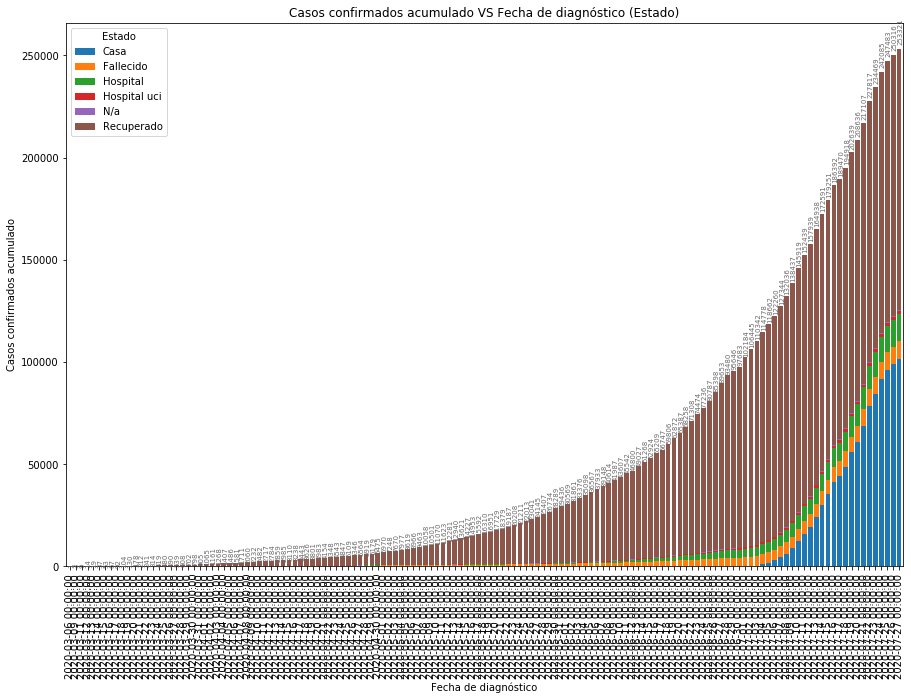

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>